# Vincenzo Palazeti

## Simulation Project

### December 9th, 2020

### Threes

Threes is a game of chance. A player begins with six die. All six die are rolled. The player must pick up at least one of the rolled die each turn. The objective is to achieve the lowest score possible. 

In this game, threes are worth zero points, and are included in the at least one selection condition. Therefore, it is always advantageous to select threes when rolled. When, though, should a one be picked up? or a two? Should a player always pick up the ones? Or, when possible, should they be left for the next roll? These are interesting questions. 

Over Thanksgiving break I played this game with a group of my friends. At first, I thought the game was random chance, but I was wrong. There are strategies that improve long term chances of winning, which I present here.

There are several possible strategies that could be theorized. Setting the rule: "Always pick up a one" is a common strategy. This could extend to always selecting ones & twos, which will be tested. These strategies can also be combined with conditions. Only picking up a one when there are two or less die in hand is an example. 

In this simulation study, I provide the probably scores, and their variances, of every possible inhand and pick up condition. Then, I pit players against one another. I provide the answer to how much more likely it is to win against naive players using the strategies with lower mean & variance scores.  


In [ ]:
import numpy as np
import pandas as pd
from numpy import random as r
import matplotlib.pyplot as plt
import seaborn as sns

## Single Game Example

Here is an annotated individual playthrough. Imagine one participate playing the game. They begin with six dice in hand. As long as they have a dice in hand, they continue to roll. Each turn they have to select at least one of the rolled die.

As shown here, if a three is rolled, the number of threes is subtracted from the inhand amount. This is the "picking up" of the three(s) for zero cost. If, on the other hand, no threes were rolled, then the minimum roll will be selected. This is what I call the naive playstyle. 

In [ ]:
die = np.array(range(1,7))
inhand = 6
score = 0
while inhand != 0:

  roll = r.choice(die,inhand)

  threes = np.where(roll - 3 == 0)

  print("Roll")
  print(roll)
  print("---")

  if len(threes[0]) > 0:
    num = len(threes[0])
    print("Rolled",num,"three(s)")
    inhand = inhand - num
    print("---")
    print(inhand,"dice in hand")
    print("---")
    print("score is still", score)
    print("---")

  else:
    print("No Threes")
    add = np.amin(roll)
    print("---")
    print("Lowest Roll is", add)
    print("---")
    score = score + add
    print("New score is", score)
    inhand = inhand - 1
    print("---")
    print(inhand,"dice in hand")
    print("---")


Roll
[4 4 4 1 6 5]
---
No Threes
---
Lowest Roll is 1
---
New score is 1
---
5 dice in hand
---
Roll
[3 3 5 3 5]
---
Rolled 3 three(s)
---
2 dice in hand
---
score is still 1
---
Roll
[1 5]
---
No Threes
---
Lowest Roll is 1
---
New score is 2
---
1 dice in hand
---
Roll
[4]
---
No Threes
---
Lowest Roll is 4
---
New score is 6
---
0 dice in hand
---


We see from this code the mean score and the variance of the naive playstyle. We see that a mean of 7 and a standard deviation of 3.65 occurs. From experience, this feels right. 

In [ ]:
die = np.array(range(1,7))
N = 1000000
scores = []
for i in range(N):
  inhand = 6
  score = 0
  while inhand != 0:
    roll = r.choice(die,inhand)
    threes = np.where(roll - 3 == 0)[0]
    # if there is a 3
    if len(threes) > 0:
      num = len(threes)
      inhand = inhand - num
      if inhand == 0:
        scores.append(score)
    # if no three   
    else:
      add = np.amin(roll)
      score = score + add
      inhand = inhand - 1
      if inhand == 0:
        scores.append(score)




print(np.sum(scores)/N)
print(np.std(scores))


7.093366
3.65731032181356


What is the mean score & variance if a player picked up every die after the first roll? Not very good. We see a mean score of 20 with a variance near 4. This is certainly a bad strategy

In [ ]:
die = np.array(range(1,7))
N = 10000
scores=[]
for i in range(N):
  score = np.sum(r.choice(die,6))
  scores.append(score)


print(np.sum(scores)/N)
print(np.std(scores))

20.9316
4.181138773109546


## Generalized Condition & Die Combination

Here I begin the search for the optimal inhand condition and combination pickup. Here is what I mean by these terms:

### Combination:
These are the numbers which the player is willing to pick up. For example, if the combination is set to: [ 1 ], then, whenever a 1 is rolled, the player is always willing to pick it up. If the combination is [ 1, 2 ], then the player is always willing to pick up ones and twos.

### Inhand Condition:
The number of die in a players hand which determines if they are willing to pick up non-three dice. If the hand condition is set at, say, 4, then this player is willing to pick up certain die that are not a three, so long as there are 4 or less die in hand.


There are 31 different combinations. The reason for this is all of the threes are removed from the combinations, as they are always picked up. There are 6 possible inhand conditions. Therefore, there are 186 possible strategies. 

I wrote my own code to get the possible combinations. The built in functions produced very not friendly to work with lists/arrays. 

In [ ]:
# binary 
lis = []
for i in range(1<<6):
    s=bin(i)[2:]
    s='0'*(6-len(s))+s
    lis.append(list(map(int,list(s))))

# combos
nums = []
for j in range(len(lis)):
  nums.append([i for i, x in enumerate(lis[j]) if x])

# delete first null set
del nums[0]

# change from python index
combs = []
for k in range(len(nums)):
  combs.append([x+1 for x in nums[k]])

# remove threes
fin = []
for q in range(len(combs)):
  fin.append([x for x in combs[q] if x != 3])

# remove empty sets
combinations = [x for x in fin if x != []]

# remove newly created duplicates
combos = []
for elem in combinations:
    if elem not in combos:
        combos.append(elem)

Here is the generalized loop. For every combination, and every inhand condition, 10000 games are played. These are added to a dataframe, then analyzed. 

In [ ]:
frame = pd.DataFrame({
    "Score":      [],
    "Combination":    [],
    "Hand Condition": []
})

hands = np.array([1,2,3,4,5,6])
die = np.array(range(1,7))
N = 10000

scores = []
for j in combos:
  print(j)
  combo = j
  
  for k in hands:
    print(k)
    hand_cond = k
    
    for i in range(N):
      inhand = 6
      score = 0

      while inhand != 0:
        roll = r.choice(die,inhand)
        threes = np.where(roll - 3 == 0)[0]
        keeps = np.isin(roll,combo)
        
        if len(threes) > 0:
          num = len(threes)
        
          if inhand <= hand_cond:
              score = score + np.sum(roll[keeps]) 
              inhand = inhand - num - len(roll[keeps])

              if inhand == 0:
                scores.append(score)

          
          else:
            inhand = inhand - num

            if inhand == 0:
                scores.append(score)

        else: 
          if len(keeps) < 1:
            add = np.amin(roll)
            score = score + add
            inhand = inhand - 1
            
            if inhand == 0:
                scores.append(score)

          else:
            if inhand <= hand_cond:
              add = np.sum(roll[keeps]) 
              score = score + add
              inhand = inhand - len(roll[keeps])

              if inhand == 0:
                scores.append(score)
              
            else:
              add = np.amin(roll)
              score = score + add
              inhand = inhand - 1

              if inhand == 0:
                scores.append(score)

In [ ]:
# Combination Strings
combs_lis1 = [''.join(map(str, i)) for i in combos] 
# Combination Formatting
combs_lis = np.repeat(combs_lis1,len(hands)*N)
# Hand Condition Formatting
hands_lis = np.repeat(hands,N)
hands_lis = np.tile(hands_lis,len(combs_lis1))

# Put in DF
frame = pd.DataFrame({
    "Score":            scores,
    "Combination":     combs_lis,
    "Hand Condition":  hands_lis
})

Here we see the the grouped average, median, variance, minimum, and maximum of every hand condition and combination. A couple things jump out. Mainly, the fact that there are better and worse conditions and combinations. Some are much worse than others. Particularly, we see as hand condition rises the players score also rises. The variance of the score, though, also rises much quicker. Which might indicate it is high risk high reward to pick up dice liberally. 

In [ ]:
print(frame.groupby(['Hand Condition']).agg({'Score': ['mean','median','var', 'min', 'max']}))
print(frame.groupby(['Combination']).agg({'Score': ['mean','median','var', 'min', 'max']}))

                    Score                          
                     mean median        var min max
Hand Condition                                     
1                6.594474      6  13.647319   0  25
2                7.317200      7  16.627102   0  27
3                8.639148      8  22.024857   0  29
4               10.267519     10  29.014388   0  31
5               12.111113     12  37.876902   0  34
6               14.980748     15  47.930326   0  36
                 Score                          
                  mean median        var min max
Combination                                     
1             3.285583      3   4.353865   0  17
12            4.953717      5   5.815271   0  18
124           7.487850      7  13.851517   0  24
1245          9.671583      9  23.304481   0  29
12456        11.664000     11  34.267142   0  35
1246         10.318850     10  29.111370   0  34
125           8.323917      8  20.060396   0  30
1256         11.018950     10  33.949923  

Here we see all hand condition and combination scores. This is a big table, so it is difficult to analyze. Let's find the lowest value.

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var', 'min', 'max']}))

                              Score                          
                               mean median        var min max
Hand Condition Combination                                   
1              1             4.7281      4   8.571027   0  17
               12            5.1376      5   9.015768   0  18
               124           5.9371      6  10.789623   0  20
               1245          6.5117      6  11.887252   0  21
               12456         7.0819      7  13.203113   0  22
               1246          6.6610      6  12.923371   0  21
               125           6.0970      6  11.995791   0  23
               1256          6.9207      7  13.907602   0  24
               126           6.3418      6  13.720345   0  22
               14            5.7696      6  11.341450   0  21
               145           6.5331      6  12.346739   0  21
               1456          7.3303      7  14.000202   0  22
               146           6.8419      7  14.126317   0  21
        

The lowest mean score comes from a hand condition of 4 and the combination 1. The interpretation of this is:

The player picks up ones, only if there are four or less dice in hand. If a three is rolled it is always picked up. If there are no threes and the condition for selecting ones is not met, then the player picks up the lowest die.



In [ ]:
temp = frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).reset_index()
print(temp.loc[temp['Score']['mean'].idxmin()])

Hand Condition                  4
Combination                     1
Score           mean       2.7908
                median          3
                var       2.57609
Name: 93, dtype: object


I noticed from the large table that combination 1 produced a lot of very low score. Actually, hand conditions greater than 1, in concert with combination 1, where the five lowest scores. I will pit these strategies against the aforementioned naive strategy.

In [ ]:
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "1"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "2"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "3"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "4"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "5"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "6"').head(1))

                             Score                 
                              mean median       var
Hand Condition Combination                         
1              1            4.7281      4  8.571027
                             Score                 
                              mean median       var
Hand Condition Combination                         
2              1            3.4477      3  5.162581
                             Score                 
                              mean median       var
Hand Condition Combination                         
3              1            2.9522      3  3.561871
                             Score                 
                              mean median       var
Hand Condition Combination                         
4              1            2.7908      3  2.576093
                             Score                 
                              mean median       var
Hand Condition Combination                         
5           

We see here a very pretty density plot. As shown in the table, which I think counts as a data visualization, we see that as the hand condition rise, so does the mean score. Also, we see the variance rise in concert with the hand condition number.

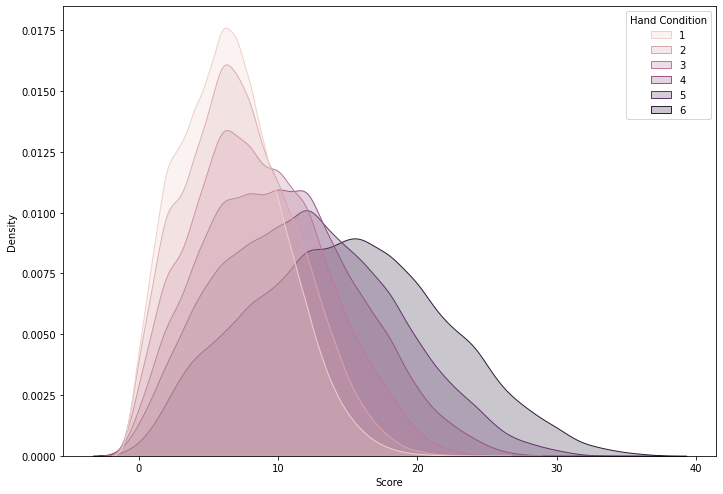

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data = frame, x="Score", hue="Hand Condition", fill=True,bw_adjust=2);

It appears that as the number within the combination rises, the flatter the distribution becomes. Also, those combinations that include only high numbers appear very flat. The combination 1 has much, much less variance. 

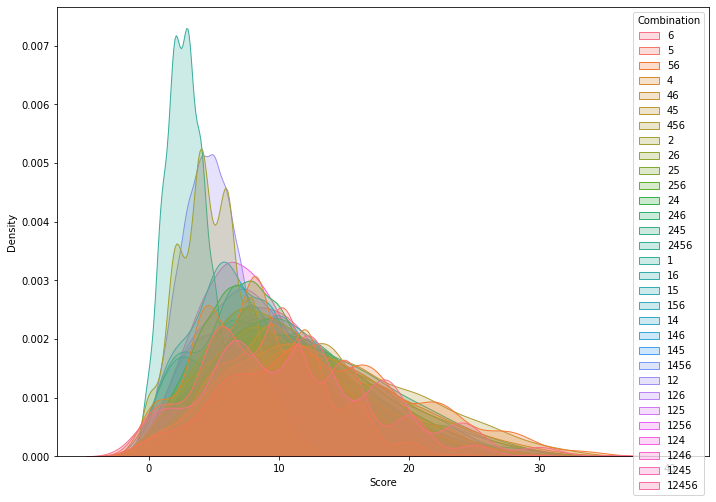

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data = frame, x="Score", hue="Combination", fill=True,bw_adjust=2 );

It would be impossible to nicely plot all 186 combinations. So, I plotted all of the hand conditions at combination 1, which is where all of our lower scores are. Recall that the lowest mean came from hand condition 4 & combination 1. Within the graph this combination is hiding in the rear, but it can be seen to have the least variance around its low mean score.

                             Score                 
                              mean median       var
Hand Condition Combination                         
1              1            4.7281      4  8.571027
                             Score                 
                              mean median       var
Hand Condition Combination                         
2              1            3.4477      3  5.162581
                             Score                 
                              mean median       var
Hand Condition Combination                         
3              1            2.9522      3  3.561871
                             Score                 
                              mean median       var
Hand Condition Combination                         
4              1            2.7908      3  2.576093
                             Score                 
                              mean median       var
Hand Condition Combination                         
5           

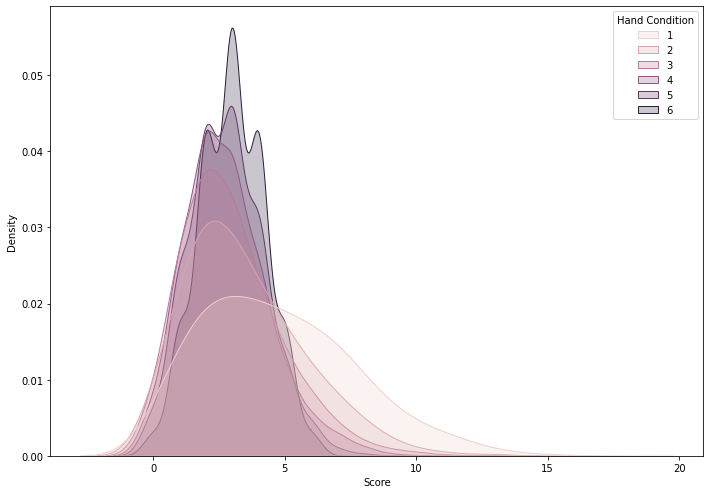

In [ ]:
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "1"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "2"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "3"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "4"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "5"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "6"').head(1)) 
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(data = frame.query("Combination == '1'"), x="Score",hue='Hand Condition',fill = True,bw_adjust=2 );

# Multiple Players

I am going to now pit players against one another. First, I will create the naive player. If, for example, three naive players are in a game, they should all have an equal chance at winning. I assert this below.

In [ ]:
def naive():
  die = np.array(range(1,7))
  inhand = 6
  score = 0
  while inhand != 0:
    roll = r.choice(die,inhand)
    threes = np.where(roll - 3 == 0)[0]
    # if there is a 3
    if len(threes) > 0:
      num = len(threes)
      inhand = inhand - num
    # if no three   
    else:
      add = np.amin(roll)
      score = score + add
      inhand = inhand - 1
  return score



The while loop here is due to ties. Threes does not end in a tie. The players with the lowest scores will play a runoff game. This was tricky to code.

In [ ]:
# if there are 3 players
scores = np.array([0,0,0])
iters = 10000

for i in range(iters):
  plyr1 = naive() ; plyr2 = naive() ; plyr3 = naive() 
  players = np.array([plyr1,plyr2,plyr3])

  if len(np.flatnonzero(players == players.min())) > 1:
    
    while len(np.flatnonzero(players == players.min())) > 1:
      indx = np.flatnonzero(players == players.min())
      plyr1 = naive() ; plyr2 = naive() ; plyr3 = naive() 
      players = np.array([plyr1,plyr2,plyr3])
      if len(np.flatnonzero(players == players.min())) > 1:
        continue
      else:
        scores[indx[players[indx].argmin()]] += 1
        break      
  else:
    scores[np.argmin(players)] +=1

Here we see that each player has a roughly equal chance of winning when all players use the naive strategy.

In [ ]:
for i in range(len(scores)):
  print(f"Players {i+1}'s win percentage is {100*scores[i]/iters}%")

Players 1's win percentage is 33.33%
Players 2's win percentage is 33.18%
Players 3's win percentage is 33.49%


I define a generalizable strategy function. The two possible parameters are combination and hand condition. Combination can be a single number or an array. Hand condition is a number 1-6. Anything higher than 6 is functionally 6, vice versa with 0.

In [ ]:
def strat(combination, hand_condition):
  die = np.array(range(1,7))
  inhand = 6
  score = 0
  combo = combination
  hand_cond = hand_condition

  while inhand != 0:
    roll = r.choice(die,inhand)
    threes = np.where(roll - 3 == 0)[0]
    keeps = np.isin(roll,combo)
        
    if len(threes) > 0:
      num = len(threes)
        
      if inhand <= hand_cond:
        score = score + np.sum(roll[keeps]) 
        inhand = inhand - num - len(roll[keeps])
          
      else:
        inhand = inhand - num

    else: 
      if len(keeps) < 1:
        add = np.amin(roll)
        score = score + add
        inhand = inhand - 1
            
      else:
        if inhand <= hand_cond:
          add = np.sum(roll[keeps]) 
          score = score + add
          inhand = inhand - len(roll[keeps])

        else:
          add = np.amin(roll)
          score = score + add
          inhand = inhand - 1

  return score


Player 3 is going to use the best strategy. Players 1 & 2 use th naive strategy. 

In [ ]:
scores = np.array([0,0,0])
iters = 1000

for i in range(iters):
  plyr1 = naive() ; plyr2 = naive() ; plyr3 = strat(1,4)
  players = np.array([plyr1,plyr2,plyr3])

  if len(np.flatnonzero(players == players.min())) > 1:
    
    while len(np.flatnonzero(players == players.min())) > 1:
      indx = np.flatnonzero(players == players.min())
      plyr1 = naive() ; plyr2 = naive() ; plyr3 = naive() 
      players = np.array([plyr1,plyr2,plyr3])
      if len(np.flatnonzero(players == players.min())) > 1:
        continue
      else:
        scores[indx[players[indx].argmin()]] += 1
        break      
  else:
    scores[np.argmin(players)] +=1

We see that player three more than doubles their win percentage. Not bad

In [ ]:
for i in range(len(scores)):
  print(f"Players {i+1}'s win percentage is {100*scores[i]/iters}%")

Players 1's win percentage is 11.9%
Players 2's win percentage is 11.6%
Players 3's win percentage is 76.5%


The larger the group of players becomes, the lower the strategizing player's score becomes, as there is still a fair amount of variance.

In [ ]:
scores = np.zeros(6)
iters = 10000

for i in range(iters):
  plyr1 = naive() ; plyr2 = naive() ; plyr3 = strat(1,4) ; plyr4 = naive(); plyr5 = naive(); plyr6 = naive()
  players = np.array([plyr1,plyr2,plyr3,plyr4,plyr5,plyr6])

  if len(np.flatnonzero(players == players.min())) > 1:
    
    while len(np.flatnonzero(players == players.min())) > 1:
      indx = np.flatnonzero(players == players.min())
      plyr1 = naive() ; plyr2 = naive() ; plyr3 = strat(1,4) ; plyr4 = naive(); plyr5 = naive(); plyr6 = naive()
      players = np.array([plyr1,plyr2,plyr3,plyr4,plyr5,plyr6])
      if len(np.flatnonzero(players == players.min())) > 1:
        continue
      else:
        scores[indx[players[indx].argmin()]] += 1
        break      
  else:
    scores[np.argmin(players)] +=1

In [ ]:
for i in range(len(scores)):
  print(f"Players {i+1}'s win percentage is {100*scores[i]/iters}%")

Players 1's win percentage is 8.25%
Players 2's win percentage is 8.68%
Players 3's win percentage is 58.37%
Players 4's win percentage is 8.2%
Players 5's win percentage is 8.06%
Players 6's win percentage is 8.44%


Finally, I want to pit all of the strategies against eachother.

In [ ]:
scores = np.zeros(5)
iters = 10000

for i in range(iters):
  plyr1 = strat(1,2) ; plyr2 = strat(1,3) ; plyr3 = strat(1,4) ; plyr4 = strat(1,5); plyr5 = strat(1,6); 
  players = np.array([plyr1,plyr2,plyr3,plyr4,plyr5])

  if len(np.flatnonzero(players == players.min())) > 1:
    
    while len(np.flatnonzero(players == players.min())) > 1:
      indx = np.flatnonzero(players == players.min())
      plyr1 = strat(1,2) ; plyr2 = strat(1,3) ; plyr3 = strat(1,4) ; plyr4 = strat(1,5); plyr5 = strat(1,6); 
      players = np.array([plyr1,plyr2,plyr3,plyr4,plyr5])
      if len(np.flatnonzero(players == players.min())) > 1:
        continue
      else:
        scores[indx[players[indx].argmin()]] += 1
        break      
  else:
    scores[np.argmin(players)] +=1

Player two is the winner. Her strategy is always pick up ones when you have three or less die in your hand. This is an interesting result, because, if you look below where I have reposted the long run statistics, other combinations have a lower score, and lower variance. This is possibly a mistake. 

In [ ]:
for i in range(len(scores)):
  print(f"Players {i+1}'s win percentage is {100*scores[i]/iters}%")

Players 1's win percentage is 19.89%
Players 2's win percentage is 24.31%
Players 3's win percentage is 23.55%
Players 4's win percentage is 20.14%
Players 5's win percentage is 12.11%


In [ ]:
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "1"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "2"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "3"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "4"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "5"').head(1))
print(frame.groupby(['Hand Condition','Combination']).agg({'Score': ['mean','median','var']}).query('`Hand Condition` == "6"').head(1))

                             Score                 
                              mean median       var
Hand Condition Combination                         
1              1            4.7281      4  8.571027
                             Score                 
                              mean median       var
Hand Condition Combination                         
2              1            3.4477      3  5.162581
                             Score                 
                              mean median       var
Hand Condition Combination                         
3              1            2.9522      3  3.561871
                             Score                 
                              mean median       var
Hand Condition Combination                         
4              1            2.7908      3  2.576093
                             Score                 
                              mean median       var
Hand Condition Combination                         
5           

## Conclusion

This was a interesting look into a game I had not thought much about. Games become complex very quickly. Many of the optimal strategies I found were readily understood by anyone who has played the game. There is intuition in the choices. What I did not expect was how low the mean scores were for the best strategies. In my estimation, setting your hand condtion to 5 and always picking up ones is the best strategy. It has the lowest mean and variance. 

In future work, it would be very interesting to know how the state of the game should influence playstyle. This would require a greater resolution on the variance of the strategies. If a player already has a score of 2 or 3, the optimal strategy might change. This gets very complex, very quickly. I think it would be an awesome question to answer.